# Generate a True Random Dice Roller

In [2]:
from qiskit import *

In [3]:
def diceCircuit(circuit,qr,cr):
    for i in range(len(qr)):
        circuit.h(qr[i])
    circuit.measure(qr,cr)
    return circuit

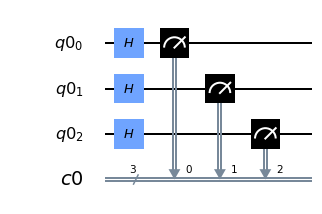

In [4]:
qr=QuantumRegister(3)
cr=ClassicalRegister(3)
circuit = QuantumCircuit(qr,cr)
circuit = diceCircuit(circuit,qr,cr)
circuit.draw(output='mpl')

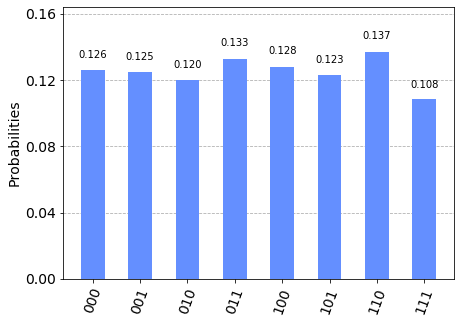

In [5]:
simulator = Aer.get_backend('qasm_simulator') # From Qiskit's Aer package we select qasm (quantum assembly) simulator
result = execute(circuit,backend=simulator).result() # Execute our circuit with backend as the qasm simulator and store the results
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

In [6]:
result = result.data()
print(result["counts"])
result = result["counts"]
del result['0x0']
del result['0x7']
print(result)
roll = min(result, key=result.get)
print("Number rolled = ",int(roll, 16))

{'0x7': 111, '0x3': 136, '0x1': 128, '0x0': 129, '0x2': 123, '0x6': 140, '0x5': 126, '0x4': 131}
{'0x3': 136, '0x1': 128, '0x2': 123, '0x6': 140, '0x5': 126, '0x4': 131}
Number rolled =  2
